# Titanic Prediction Model

* Preparation Library
* Show The Data
* Split Numerical and Categorical Data
* Numerial Imputation
* Categorical Imputation
* Join Categorical and Numerical Variable
* Visualization
* Preparation Data to Modelling
* Modelling

## Preparation Library

In [782]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, 

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

## Show The Data

In [3]:
# read train & test csv files as a DataFrame
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [976]:
# drop PassengerId and Survived from train data
train_df = train.drop(['PassengerId','Survived'], axis=1)

In [978]:
train_df.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [979]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [980]:
# drop PassengerId from data test
test_df = test.drop(['PassengerId'], axis=1)

In [981]:
test_df.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [982]:
# count size on train and test data
print(train_df.shape,test_df.shape)

((891, 10), (418, 10))


In [983]:
# concat data train and test
df_all = pd.concat([train_df, test_df], axis =0)
df_all.shape

(1309, 10)

In [26]:
train_df.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [27]:
df_all.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
# size of all data
df_all.shape

(1309, 10)

## Split Numerical and Categorical Data

In [29]:
all_numerical = df_all._get_numeric_data() # get numerical data from all data

In [30]:
# get categorical data from all data
all_categorical = df_all.drop(all_numerical.columns, axis=1) 

In [31]:
all_numerical.head(2) # show all variable in numerical data

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833


In [32]:
# check null in numerical data and we can see that numerical has empty / NaN
all_numerical.isnull().sum() 

Pclass      0
Age       263
SibSp       0
Parch       0
Fare        1
dtype: int64

In [33]:
all_categorical.head(2) # show all variable in categorical data

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C


In [34]:
# check null in categorical data and we can see that numerical has empty / NaN
all_categorical.isnull().sum() 

Name           0
Sex            0
Ticket         0
Cabin       1014
Embarked       2
dtype: int64

## Numerial Imputation

In [35]:
from sklearn.preprocessing import Imputer

In [36]:
# change missing value to Median of each variable data
imput_numerical = Imputer(missing_values='NaN', strategy='median') 

In [37]:
imput_numerical.fit(all_numerical) # recording median for each column

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [38]:
all_numerical.isnull().sum() # check missing value

Pclass      0
Age       263
SibSp       0
Parch       0
Fare        1
dtype: int64

In [39]:
imput_numerical.transform(all_numerical) # transform missing value to median data

array([[  3.    ,  22.    ,   1.    ,   0.    ,   7.25  ],
       [  1.    ,  38.    ,   1.    ,   0.    ,  71.2833],
       [  3.    ,  26.    ,   0.    ,   0.    ,   7.925 ],
       ..., 
       [  3.    ,  38.5   ,   0.    ,   0.    ,   7.25  ],
       [  3.    ,  28.    ,   0.    ,   0.    ,   8.05  ],
       [  3.    ,  28.    ,   1.    ,   1.    ,  22.3583]])

In [40]:
numerical_data_imputed = pd.DataFrame(imput_numerical.transform(all_numerical))

In [41]:
numerical_data_imputed.head()

,0,1,2,3,4
0,3.0,22.0,1.0,0.0,7.2500
1,1.0,38.0,1.0,0.0,71.2833
2,3.0,26.0,0.0,0.0,7.9250
3,1.0,35.0,1.0,0.0,53.1000
4,3.0,35.0,0.0,0.0,8.0500


In [42]:
# give same name column to numerical imputed
numerical_data_imputed.columns = all_numerical.columns 

# give same index column to numerical imputed
numerical_data_imputed.index = all_numerical.index 

In [43]:
numerical_data_imputed.head()

,Pclass,Age,SibSp,Parch,Fare
0,3.0,22.0,1.0,0.0,7.2500
1,1.0,38.0,1.0,0.0,71.2833
2,3.0,26.0,0.0,0.0,7.9250
3,1.0,35.0,1.0,0.0,53.1000
4,3.0,35.0,0.0,0.0,8.0500


In [44]:
# check missing value to numerical data. We can see there's no missing value
numerical_data_imputed.isnull().sum() 

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

### Feature Engineering Numerical Data

In [45]:
#Creating new family_size column
numerical_data_imputed['Family_Size']=numerical_data_imputed['SibSp']+numerical_data_imputed['Parch'] 

# This is an interaction term, since AGE and CLASS
# are both numbers we can just multiply them.
numerical_data_imputed['Age*Class']=numerical_data_imputed['Age']*numerical_data_imputed['Pclass'] 

# Here we divide the fare by the number of family members traveling together, 
#I’m not exactly sure what this represents, but it’s easy enough to add in.
numerical_data_imputed['Fare_Per_Person']=numerical_data_imputed['Fare']/(numerical_data_imputed['Family_Size']+1) 

In [1067]:
print(numerical_data_imputed.shape)
numerical_data_imputed.head(2)

(1309, 8)


,Pclass,Age,SibSp,Parch,Fare,Family_Size,Age*Class,Fare_Per_Person
0,3.0,22.0,1.0,0.0,7.2500,1.0,66.0,3.62500
1,1.0,38.0,1.0,0.0,71.2833,1.0,38.0,35.64165


In [47]:
from sklearn.preprocessing import StandardScaler

def standardizer(data):
    # change column name so that column name wasn't gone
    data_columns = data.columns  
    
    # change index so that index wasn't gone
    data_index = data.index 
    normalize = StandardScaler()
    normalize.fit(data)
    
    # normalize data so that scale variable data still the same
    normalize_x = pd.DataFrame(normalize.transform(data)) 
    normalize_x.columns = data_columns
    return normalize_x, normalize

x_numerical_normalized, normalize = standardizer(numerical_data_imputed)

## Categorical Imputation

In [48]:
all_categorical.isnull().sum()

Name           0
Sex            0
Ticket         0
Cabin       1014
Embarked       2
dtype: int64

In [49]:
# change missing value to 'KOSONG'
categorical_imputed = all_categorical.fillna(value="KOSONG") 

In [50]:
categorical_imputed.isnull().sum()

Name        0
Sex         0
Ticket      0
Cabin       0
Embarked    0
dtype: int64

In [51]:
categorical_imputed.head(2)

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,KOSONG,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C


### Feature Engineering Categorical Data

#### Title

In [52]:
title = pd.DataFrame()
# we extract the title from each name
title[ 'Title' ] = categorical_imputed[ 'Name' ].map( 
    lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

title.head()

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


In [291]:
def replace_title(x):
    j = []
    for i in x['Title']:
        if i in ['Mlle','Ms']:
            j.append('Miss')
        else: j.append(i)
            
    return j

In [314]:
Title = replace_title(title)

In [315]:
name = pd.DataFrame()
name['Title'] = Title

In [317]:
name.head(2)

,Title
0,Mr
1,Mrs


In [53]:
pd.unique(title['Title'])

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

#### Cabin

In [54]:
pd.unique(categorical_imputed['Cabin'])

array(['KOSONG', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', '

In [55]:
cabin = pd.DataFrame()
cabin['Cabin'] = categorical_imputed['Cabin'].map(lambda cabin: cabin[0].strip())

In [56]:
cabin.head()

,Cabin
0,K
1,C
2,K
3,C
4,K


In [57]:
pd.unique(cabin['Cabin'])

array(['K', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

#### Ticket

In [673]:
ticket = pd.DataFrame()

In [674]:
def num_ticket(x):
    num = np.arange(0,10,1)
    j = []
    for i in num:
        j.append(str(i))
        
    k = []
    for i in x:
        if i[0] in j:
            k.append('KOSONG')
        else:
            k.append(i[0])
            
            
    return k

In [985]:
ticket['Ticket'] = num_ticket(categorical_imputed['Ticket'])

In [986]:
pd.unique(ticket['Ticket'])

array(['A', 'P', 'S', 'KOSONG', 'C', 'W', 'F', 'L'], dtype=object)

In [999]:
categorical_imputed['Type of Ticket'] = ticket

#### Number of Cabin

In [989]:
def numeric_cabin(data,tipe):
    j = []
    for i in data[tipe]:
        if i[0]=='K':
            j.append(i)
        elif i.find(' ')>1:
            j.append(int(i[1:i.find(' ')]))
        elif i.find(' ')==1:
            j.append(int(i[3:]))
        elif len(i)==1:
            j.append(1)
        else:
            j.append(int(i[1:len(i)]))
            
    return j


In [991]:
# split type of cabin and number of cabin
kabin = numeric_cabin(categorical_imputed,tipe='Cabin') 

In [995]:
categorical_imputed['Cabin Number'] = kabin 

In [996]:
kabin_no = categorical_imputed['Cabin Number'].replace('KOSONG',np.nan)

In [997]:
kabin_no = kabin_no.replace(np.nan,kabin_no.median())

In [998]:
categorical_imputed['Cabin Number'] = kabin_no

In [1000]:
categorical_imputed.head()

,Name,Sex,Ticket,Cabin,Embarked,Cabin Number,Type of Ticket
0,"Braund, Mr. Owen Harris",male,A/5 21171,KOSONG,S,41.0,A
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,85.0,P
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,KOSONG,S,41.0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,123.0,KOSONG
4,"Allen, Mr. William Henry",male,373450,KOSONG,S,41.0,KOSONG


In [1200]:
# exclude Name, Ticket, and Cabin. Because they're unstructured
categorical_imputed_reduction = categorical_imputed[['Sex','Embarked',
                                    'Cabin Number','Type of Ticket']]

In [1201]:
categorical_imputed_reduction.head()

,Sex,Embarked,Cabin Number,Type of Ticket
0,male,S,41.0,A
1,female,C,85.0,P
2,female,S,41.0,S
3,female,S,123.0,KOSONG
4,male,S,41.0,KOSONG


In [1202]:
# concat with cabin
categorical_concat = pd.concat([categorical_imputed_reduction,cabin],axis=1) 

In [1203]:
categorical_concat.head()

,Sex,Embarked,Cabin Number,Type of Ticket,Cabin
0,male,S,41.0,A,K
1,female,C,85.0,P,C
2,female,S,41.0,S,K
3,female,S,123.0,KOSONG,C
4,male,S,41.0,KOSONG,K


In [1204]:
categorical_concat.isnull().sum()

Sex               0
Embarked          0
Cabin Number      0
Type of Ticket    0
Cabin             0
dtype: int64

In [1205]:
# get dummies from categorical data
categorical_dummy = pd.get_dummies(categorical_concat) 

In [1206]:
categorical_dummy.head()

,Cabin Number,Sex_female,Sex_male,Embarked_C,Embarked_KOSONG,Embarked_Q,Embarked_S,Type of Ticket_A,Type of Ticket_C,Type of Ticket_F,...,Type of Ticket_W,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_K,Cabin_T
0,41.0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,85.0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,41.0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,123.0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,41.0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Cabin Number

In [1042]:
no_cabin = pd.DataFrame(categorical_dummy['Cabin Number'])
no_cabin.head(2)

,Cabin Number
0,41.0
1,85.0


In [1043]:
# normalize number of cabin
cabin_number_normalize, normalize = standardizer(no_cabin) 

In [1044]:
cabin_number_normalize.head()

,Cabin Number
0,-0.103579
1,2.547867
2,-0.103579
3,4.837752
4,-0.103579


In [1045]:
print(numerical_data_imputed.shape, categorical_dummy.shape) # show variable size

((1309, 8), (1309, 34))


In [1046]:
# drop Cabin Number from categorical dummy
categorical_all_dummy = categorical_dummy.drop('Cabin Number',axis=1) 

In [1047]:
categorical_all_dummy.head()

,Sex_female,Sex_male,Embarked_C,Embarked_KOSONG,Embarked_Q,Embarked_S,Title_Capt,Title_Col,Title_Don,Title_Dona,...,Title_the Countess,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_K,Cabin_T
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [1048]:
categorical_all_dummy.shape # size categorical is 33

(1309, 33)

In [1049]:
cabin_number_normalize.shape

(1309, 1)

In [1050]:
# include cabin number to numerical normalize
x_numerical_normalized['Cabin Number'] = cabin_number_normalize 
x_numerical_normalized.shape # size numerical is 9

(1309, 9)

In [1051]:
x_numerical_normalized.head(2)

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Age*Class,Fare_Per_Person,Cabin Number
0,0.841916,-0.581628,0.481288,-0.445,-0.503291,0.073352,0.076367,-0.472442,-0.103579
1,-1.546098,0.658652,0.481288,-0.445,0.734744,0.073352,-0.823324,0.423194,2.547867


In [1052]:
categorical_all_dummy.isnull().sum()

Sex_female            0
Sex_male              0
Embarked_C            0
Embarked_KOSONG       0
Embarked_Q            0
Embarked_S            0
Title_Capt            0
Title_Col             0
Title_Don             0
Title_Dona            0
Title_Dr              0
Title_Jonkheer        0
Title_Lady            0
Title_Major           0
Title_Master          0
Title_Miss            0
Title_Mlle            0
Title_Mme             0
Title_Mr              0
Title_Mrs             0
Title_Ms              0
Title_Rev             0
Title_Sir             0
Title_the Countess    0
Cabin_A               0
Cabin_B               0
Cabin_C               0
Cabin_D               0
Cabin_E               0
Cabin_F               0
Cabin_G               0
Cabin_K               0
Cabin_T               0
dtype: int64

In [1053]:
print(categorical_all_dummy.shape,x_numerical_normalized.shape)

((1309, 33), (1309, 9))


In [1054]:
titanic_concat = categorical_all_dummy 

In [1055]:
x_numerical_normalized.head() # show numerical data

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Age*Class,Fare_Per_Person,Cabin Number
0,0.841916,-0.581628,0.481288,-0.445,-0.503291,0.073352,0.076367,-0.472442,-0.103579
1,-1.546098,0.658652,0.481288,-0.445,0.734744,0.073352,-0.823324,0.423194,2.547867
2,0.841916,-0.271558,-0.479087,-0.445,-0.490240,-0.558346,0.461949,-0.352154,-0.103579
3,-1.546098,0.426099,0.481288,-0.445,0.383183,0.073352,-0.919720,0.168863,4.837752
4,0.841916,0.426099,-0.479087,-0.445,-0.487824,-0.558346,1.329509,-0.348657,-0.103579


## Join Categorical and Numerical Variable

In [1056]:
# join categorical and numerical variable
titanic_concat['Pclass'] = x_numerical_normalized['Pclass']
titanic_concat['Age'] = x_numerical_normalized['Age']
titanic_concat['SibSp'] = x_numerical_normalized['SibSp'] 
titanic_concat['Parch'] = x_numerical_normalized['Parch'] 
titanic_concat['Fare'] = x_numerical_normalized['Fare']
titanic_concat['Family Size'] = x_numerical_normalized['Family_Size'] 
titanic_concat['AgeClass'] = x_numerical_normalized['Age*Class'] 
titanic_concat['Fare_Per_Person'] = x_numerical_normalized['Fare_Per_Person']
titanic_concat['Cabin Number'] = x_numerical_normalized['Cabin Number']

In [1057]:
x_numerical_normalized.isnull().sum()

Pclass             0
Age                0
SibSp              0
Parch              0
Fare               0
Family_Size        0
Age*Class          0
Fare_Per_Person    0
Cabin Number       0
dtype: int64

In [1058]:
titanic_concat.head()

,Sex_female,Sex_male,Embarked_C,Embarked_KOSONG,Embarked_Q,Embarked_S,Title_Capt,Title_Col,Title_Don,Title_Dona,...,Cabin_T,Pclass,Age,SibSp,Parch,Fare,Family Size,AgeClass,Fare_Per_Person,Cabin Number
0,0,1,0,0,0,1,0,0,0,0,...,0,0.841916,-0.581628,0.481288,-0.445,-0.503291,0.073352,0.076367,-0.472442,-0.103579
1,1,0,1,0,0,0,0,0,0,0,...,0,-1.546098,0.658652,0.481288,-0.445,0.734744,0.073352,-0.823324,0.423194,2.547867
2,1,0,0,0,0,1,0,0,0,0,...,0,0.841916,-0.271558,-0.479087,-0.445,-0.490240,-0.558346,0.461949,-0.352154,-0.103579
3,1,0,0,0,0,1,0,0,0,0,...,0,-1.546098,0.426099,0.481288,-0.445,0.383183,0.073352,-0.919720,0.168863,4.837752
4,0,1,0,0,0,1,0,0,0,0,...,0,0.841916,0.426099,-0.479087,-0.445,-0.487824,-0.558346,1.329509,-0.348657,-0.103579


## Visualization

In [1079]:
# preparation to plotting data
data_plot = pd.concat([numerical_data_imputed[:len(train)],
                       categorical_concat[:len(train)],train['Survived']],axis=1)

In [1080]:
data_plot.head()

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Age*Class,Fare_Per_Person,Sex,Embarked,Cabin Number,Title,Cabin,Survived
0,3.0,22.0,1.0,0.0,7.2500,1.0,66.0,3.62500,male,S,41.0,Mr,K,0
1,1.0,38.0,1.0,0.0,71.2833,1.0,38.0,35.64165,female,C,85.0,Mrs,C,1
2,3.0,26.0,0.0,0.0,7.9250,0.0,78.0,7.92500,female,S,41.0,Miss,K,1
3,1.0,35.0,1.0,0.0,53.1000,1.0,35.0,26.55000,female,S,123.0,Mrs,C,1
4,3.0,35.0,0.0,0.0,8.0500,0.0,105.0,8.05000,male,S,41.0,Mr,K,0


In [ ]:
data_plot

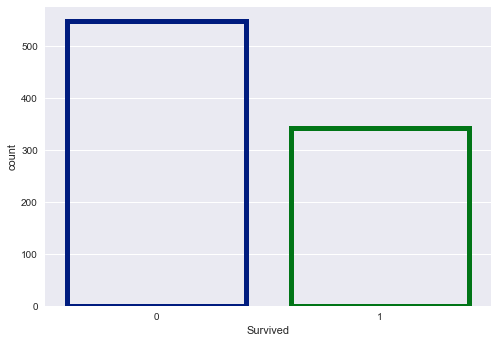

In [1081]:
ax = sns.countplot(x="Survived", data=data_plot,
...                    facecolor=(0, 0, 0, 0),
...                    linewidth=5,
...                    edgecolor=sns.color_palette("dark", 3))

In [1090]:
str(round(100*data_plot['Survived'].mean(),2))+'%'

'38.38%'

Only 38% survived from the death

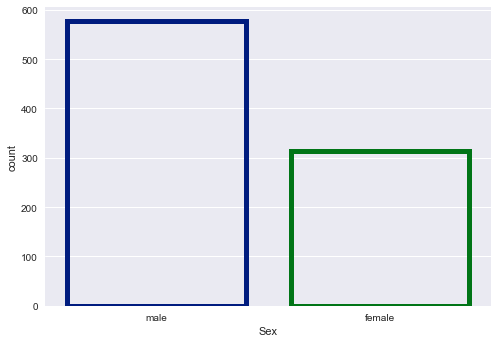

In [1181]:
ax = sns.countplot(x="Sex", data=data_plot,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

In this case male passengers more than women passengers

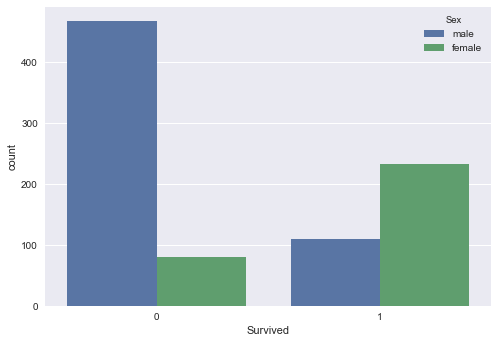

In [1091]:
ax = sns.countplot(x="Survived", hue="Sex", data=data_plot)

Overall number of male passengers not survived more than women passengers. Perhaps because men sacrificed more to save women as we can see in the Titanic movie, Jack sacrificed his life for Rose.

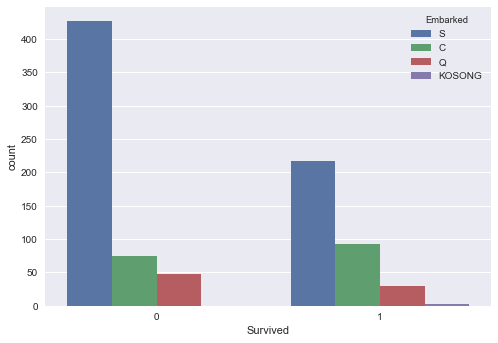

In [1209]:
ax1 = sns.countplot(x="Survived", hue="Embarked", data=data_plot)

Passengers Titanic dominated from Embarked S, so that people who died and who lived even more on Embarked S.

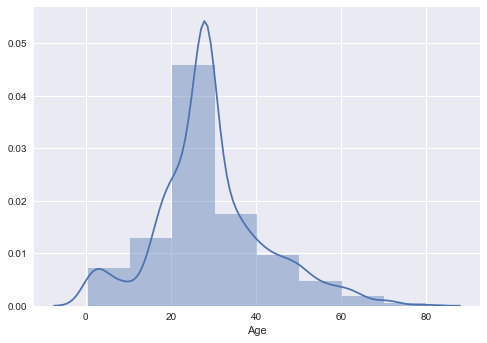

In [1105]:
sns.distplot(data_plot['Age'], bins=8, kde=True, rug=False);

There are many passenger Titanic is productive age that 20 - 30 years old

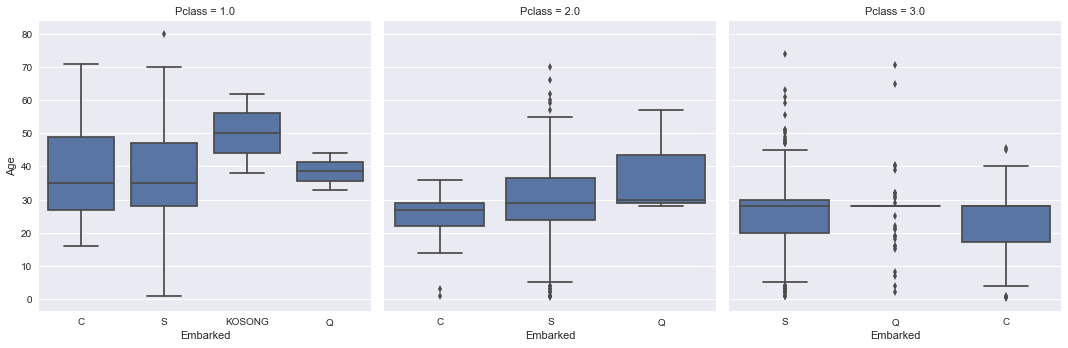

In [1183]:
g = sns.FacetGrid(data_plot, col="Pclass", sharex=False,
                  gridspec_kws={"width_ratios": [4, 4, 4]},size=5)
g.map(sns.boxplot, "Embarked", "Age");

* In the first class there are an unfilled Embarked. In Southampton Embarked there are an outlier that is 80 years old. And in the first class many people who 30 - 40 years old with Embarked Cherbourg and Southampton. In this Class are dominated by old people. This can be caused by the cost is quite expensive to get tickets.
    
* In the second class there are outliers on Cherbourg and Southampton are both toddlers and outliers over 50 years at Embarked Southampton. In this second class most passengers productive age 25-35 years old.
    
* In third class there are outliers for every Embarked, this can be interpreted that the diversity of age in this class are big enough, from children to old man. In this class are dominated by young man, probably because the cost is the cheapest.

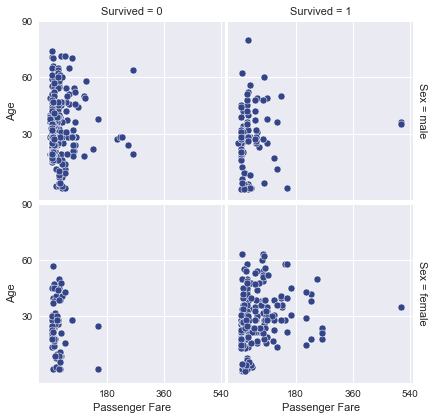

In [1199]:
# with sns.axes_style("white"):
g = sns.FacetGrid(data_plot, row="Sex", col="Survived", margin_titles=True, size=3)
g.map(plt.scatter, "Fare", "Age", color="#334488", edgecolor="white", lw=.5);
g.set_axis_labels("Passenger Fare", "Age");
g.set(xticks=[180, 360, 540], yticks=[30, 60, 90]);
g.fig.subplots_adjust(wspace=.02, hspace=.02);

There are any outliers data on survival from 30 to 40 years old with male and female gender with fare more than 500. It is feared that will accurateless model, then the data will be eliminated.

## Preparation Data to Modelling

In [1061]:
y = train['Survived']

In [1062]:
y.shape

(891L,)

In [1063]:
x = titanic_concat[:len(train)]

In [1064]:
x.shape

(891, 42)

In [1065]:
x_test_normalized = titanic_concat[len(train):]

In [1066]:
x_test_normalized.shape

(418, 42)

In [888]:
from sklearn.model_selection import train_test_split

In [889]:
x_train, x_valid, y_train, y_valid = train_test_split(x,
                y, test_size = 0.3, random_state = 123)

In [890]:
x_train.isnull().sum()

Sex_female            0
Sex_male              0
Embarked_C            0
Embarked_KOSONG       0
Embarked_Q            0
Embarked_S            0
Title_Capt            0
Title_Col             0
Title_Don             0
Title_Dona            0
Title_Dr              0
Title_Jonkheer        0
Title_Lady            0
Title_Major           0
Title_Master          0
Title_Miss            0
Title_Mlle            0
Title_Mme             0
Title_Mr              0
Title_Mrs             0
Title_Ms              0
Title_Rev             0
Title_Sir             0
Title_the Countess    0
Cabin_A               0
Cabin_B               0
Cabin_C               0
Cabin_D               0
Cabin_E               0
Cabin_F               0
Cabin_G               0
Cabin_K               0
Cabin_T               0
Pclass                0
Age                   0
SibSp                 0
Parch                 0
Fare                  0
Family Size           0
AgeClass              0
Fare_Per_Person       0
Cabin Number    

## Modelling

### List of Model

In [717]:
all_model = [DecisionTreeClassifier,
            LogisticRegression,
            SVC,
            LinearSVC,
            RandomForestClassifier,
            GradientBoostingClassifier,
            AdaBoostClassifier]
all_model

[sklearn.tree.tree.DecisionTreeClassifier,
 sklearn.linear_model.logistic.LogisticRegression,
 sklearn.svm.classes.SVC,
 sklearn.svm.classes.LinearSVC,
 sklearn.ensemble.forest.RandomForestClassifier,
 sklearn.ensemble.gradient_boosting.GradientBoostingClassifier,
 sklearn.ensemble.weight_boosting.AdaBoostClassifier]

In [718]:
model_name = ['Dec Tree','Log Reg','SVC',
              'Lin SVC','Rand For','Grad Boost', 'Ada Boost']

### Find The Best Model

In [719]:
datatr = []
datasc = []
for i in all_model:
    model = i(random_state=123)
    model.fit(x_train,y_train)
    datatr.append(model.score( x_train , y_train ))
    datasc.append(model.score( x_valid , y_valid ))
    print(i, model.score( x_train , y_train ) , model.score( x_valid , y_valid ))

(<class 'sklearn.tree.tree.DecisionTreeClassifier'>, 0.9903691813804173, 0.75373134328358204)
(<class 'sklearn.linear_model.logistic.LogisticRegression'>, 0.8330658105939005, 0.81716417910447758)
(<class 'sklearn.svm.classes.SVC'>, 0.8314606741573034, 0.83955223880597019)
(<class 'sklearn.svm.classes.LinearSVC'>, 0.8330658105939005, 0.83582089552238803)
(<class 'sklearn.ensemble.forest.RandomForestClassifier'>, 0.9759229534510433, 0.82835820895522383)
(<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 0.9165329052969502, 0.82462686567164178)
(<class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 0.8651685393258427, 0.83208955223880599)


### Compare Model Each Other

In [720]:
## compare model each other

data1 = pd.DataFrame()
data1['model'] = all_model
data1['score training'] = datatr
data1['score test'] = datasc
plot_model_name = data1
plot_model_name['Model Name'] = model_name

# gap = score test - score training
plot_model_name['gap'] = 100*(- plot_model_name['score test'] + plot_model_name['score training'])
plot_model_name[['Model Name','score training','score test','gap']].sort_values(
    by='score test',ascending=False)

,Model Name,score training,score test,gap
2,SVC,0.831461,0.839552,-0.809156
3,Lin SVC,0.833066,0.835821,-0.275508
6,Ada Boost,0.865169,0.832090,3.307899
4,Rand For,0.975923,0.828358,14.756474
5,Grad Boost,0.916533,0.824627,9.190604
1,Log Reg,0.833066,0.817164,1.590163
0,Dec Tree,0.990369,0.753731,23.663784


There are top 3 score model. SVC, Linear SVC, and Ada Boosting

### Support Vector Classification

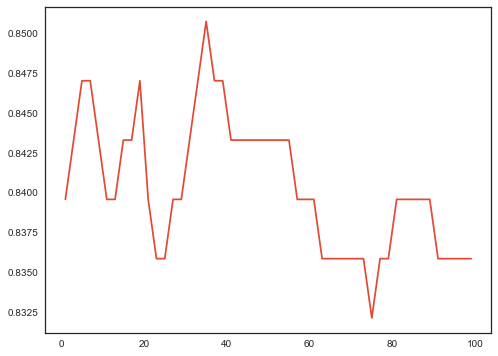

In [725]:
## find optimum hyperparameter C from SVC

C = np.arange(1,100,2)
j=[]
dat1 = []
dat2 = []
jarak = np.arange(1,100,10)
for i in C:
    model = SVC(random_state=123,C=i)
    model.fit(x_train,y_train)
    j.append(i)
    dat1.append(model.score( x_train , y_train ))
    dat2.append(model.score( x_valid , y_valid ))

plt.plot(j,dat2)

In [726]:
# The Best Score Test is 85.07%, with C = 35
datamodel = pd.DataFrame()
datamodel['n estimators'] = j
datamodel['score training'] = dat1
datamodel['score test'] = dat2
high_score = datamodel[datamodel['score test']==datamodel['score test'].max()]
high_score

,n estimators,score training,score test
17,35,0.879615,0.850746


In [761]:
model = SVC(random_state=123,C=35)
model.fit(x_train,y_train)
hasil = model.predict(x_test_normalized)
result_fix = pd.DataFrame()
result_fix['PassengerId'] = test['PassengerId']
result_fix['Survived'] = hasil
submission_sent = result_fix[['PassengerId','Survived']]
print(submission_sent.sum())
submission_sent.to_csv('Submission C35 SVC.csv')

PassengerId    460009
Survived          150
dtype: int64


### Linear Support Vector Classification

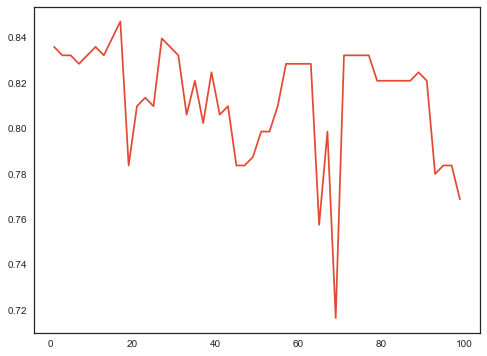

In [728]:
## find optimum hyperparameter C from Linear SVC

C = np.arange(1,100,2)
j=[]
dat1 = []
dat2 = []
jarak = np.arange(1,100,10)
for i in C:
    model = LinearSVC(random_state=123,C=i)
    model.fit(x_train,y_train)
    j.append(i)
    dat1.append(model.score( x_train , y_train ))
    dat2.append(model.score( x_valid , y_valid ))

plt.plot(j,dat2)

In [729]:
# The Best Score Test is 84.70%, with C = 17

datamodel = pd.DataFrame()
datamodel['n estimators'] = j
datamodel['score training'] = dat1
datamodel['score test'] = dat2
high_score = datamodel[datamodel['score test']==datamodel['score test'].max()]
high_score

,n estimators,score training,score test
8,17,0.839486,0.847015


In [731]:
model = LinearSVC(random_state=123,C=17)
model.fit(x_train,y_train)
hasil = model.predict(x_test_normalized)
result_fix = pd.DataFrame()
result_fix['PassengerId'] = test['PassengerId']
result_fix['Survived'] = hasil
submission_sent = result_fix[['PassengerId','Survived']]
print(submission_sent.sum())
submission_sent.to_csv('Submission C17 LinearSVC.csv')

PassengerId    460009
Survived          162
dtype: int64


### Adaptive Boosting Classifier

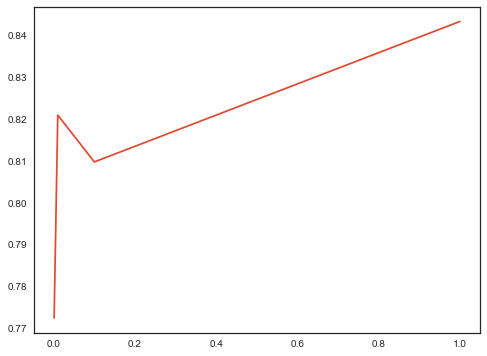

In [778]:
learning_rate = [1., .1, .01, .001]
n_estimators =  np.arange(100,1000,50)
j=[]
dat1 = []
dat2 = []
jarak = np.arange(1,100,10)
for i in learning_rate:
    model = AdaBoostClassifier(random_state=123,n_estimators=350,learning_rate=i)
    model.fit(x_train,y_train)
    j.append(i)
    dat1.append(model.score( x_train , y_train ))
    dat2.append(model.score( x_valid , y_valid ))

plt.plot(j,dat2)

In [779]:
# The Best Score Test is 84.32%, with learning rate = 1, n_estimators = 350

datamodel = pd.DataFrame()
datamodel['n estimators'] = j
datamodel['score training'] = dat1
datamodel['score test'] = dat2
high_score = datamodel[datamodel['score test']==datamodel['score test'].max()]
high_score

,n estimators,score training,score test
0,1.0,0.910112,0.843284


In [780]:
model = AdaBoostClassifier(random_state=123,n_estimators=350)
model.fit(x_train,y_train)
hasil = model.predict(x_test_normalized)
result_fix = pd.DataFrame()
result_fix['PassengerId'] = test['PassengerId']
result_fix['Survived'] = hasil
submission_sent = result_fix[['PassengerId','Survived']]
print(submission_sent.sum())
submission_sent.to_csv('Submission n350 Adaboost.csv')

PassengerId    460009
Survived          177
dtype: int64


### Bootstrap Aggregating Classifier

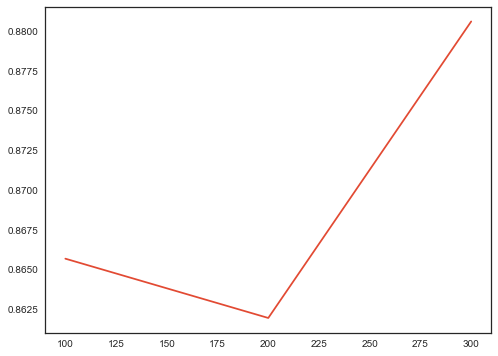

In [905]:
dectree = DecisionTreeClassifier(random_state=123)
randfor = RandomForestClassifier(random_state=123)
learning_rate = [1., .1, .01, .001]
n_estimators =  [100, 200, 300]
max_features = np.arange(1,40,1)

j=[]
dat1 = []
dat2 = []
jarak = np.arange(1,100,10)
for i in n_estimators:
    model = BaggingClassifier(random_state=123,
            n_estimators=i,max_features=10,base_estimator=randfor)
    model.fit(x_train,y_train)
    j.append(i)
    dat1.append(model.score( x_train , y_train ))
    dat2.append(model.score( x_valid , y_valid ))

plt.plot(j,dat2)

In [906]:
# The Best Score Test is 88.06%, with n_estimators = 300, max_features = 10, 
# base_estimator = Random Forest

datamodel = pd.DataFrame()
datamodel['n estimators'] = j
datamodel['score training'] = dat1
datamodel['score test'] = dat2
high_score = datamodel[datamodel['score test']==datamodel['score test'].max()]
high_score 

,n estimators,score training,score test
2,300,0.926164,0.880597


In [908]:
model.fit(x_train,y_train)
print(model.score( x_train , y_train ) , model.score( x_valid , y_valid ) )

hasil = model.predict(x_test_normalized)
result_fix = pd.DataFrame()
result_fix['PassengerId'] = test['PassengerId']
result_fix['Survived'] = hasil
submission_sent = result_fix[['PassengerId','Survived']]
print(submission_sent.sum())
submission_sent.to_csv('Submission Bagging randfor as is.csv')

(0.9261637239165329, 0.88059701492537312)
PassengerId    460009
Survived          125
dtype: int64
